## Clustering & Visualizations

> **Steps:**
1. Import libraries
2. Read & Import Data
3. Input for clustering
4. K-means Clustering
5. Attach Information of Clusters to Data
6. Visualization of Clustering
    1. Simple scatter plot
    2. Clusters colored with hue as per labels
    3. Clusters colored with hue as per labels & labels on center
    4. Clusters colored with hue as per labels, with Voronoi line as separation of clusters
    5. Clusters in grid
7. Total/Average distance to be travelled in each cluster ( Use-case specific)


    

### Import libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np

# Dataframe
import pandas as pd

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.spatial import Voronoi, voronoi_plot_2d

# Geo distance
from geopy.distance import geodesic

### Read & Import Data

In [136]:
path = os.getcwd()
path = '<your path>'
data = pd.read_csv(path + '\\testdata.csv')

In [94]:
print("Original Data file size: ", data.shape)

Original Data file size:  (3434, 3)


In [138]:
cluster_input_df = data

In [96]:
cluster_input_df.head()

,ClientName,Latitude,Longitude
0,Monica Robinson,11.026315,76.962325
1,Deanna Cook,11.004012,77.047590
2,Tyler Banks,11.052449,77.036085
3,David Brown,10.994414,76.967401
4,Clinton Smith,10.992209,76.956806


### Input for clustering

In [123]:
X = cluster_input_df[['Latitude', 'Longitude']]

In [98]:
X.head()

,Latitude,Longitude
0,11.026315,76.962325
1,11.004012,77.047590
2,11.052449,77.036085
3,10.994414,76.967401
4,10.992209,76.956806


### K-means Clustering

In [124]:
# Clusters number is 8 # Change as per need
k=8

df = X
kmeans = KMeans(n_clusters=k,init='random', n_init=1, random_state=10)
label = kmeans.fit_predict(df)

In [125]:
cluster_error = kmeans.inertia_
sil_coeff = silhouette_score(df, label)

centroids = kmeans.cluster_centers_
centerlist = kmeans.cluster_centers_.tolist()
labels = kmeans.labels_ 

cluster_labels = [*range(0, len(labels), 1)]  
dict_centriods = dict(zip(cluster_labels, centerlist)) 

### Attach Information of Clusters to Data

In [139]:
cluster_input_df['ClusterNumber'] = kmeans.labels_
#cluster_input_df["silhouette_values"] = silhouette_vals

In [140]:
# Get and store cluster centroid values
cluster_input_df['centroids'] = ''
for index, row in cluster_input_df.iterrows():
    label = cluster_input_df['ClusterNumber'][index]
    cluster_input_df['centroids'][index] = centroids[label]

In [141]:
cluster_input_df.head()

,ClientName,Latitude,Longitude,ClusterNumber,centroids
0,Monica Robinson,11.026315,76.962325,4,"[11.034587008659217, 76.96008317974861]"
1,Deanna Cook,11.004012,77.047590,7,"[11.03203629922179, 77.05078641595331]"
2,Tyler Banks,11.052449,77.036085,7,"[11.03203629922179, 77.05078641595331]"
3,David Brown,10.994414,76.967401,1,"[10.990329471652174, 76.94906085113044]"
4,Clinton Smith,10.992209,76.956806,1,"[10.990329471652174, 76.94906085113044]"


In [145]:
# Create unique code for Area formation
cluster_input_df['UniqueClusterID'] = "C_" + (cluster_input_df['ClusterNumber']).astype(str) 
agg_data = cluster_input_df.groupby(['ClusterNumber', 'UniqueClusterID'], 
                                       as_index=False).agg({'ClientName' : 'count'})

agg_data.columns = ['ClusterNumber', 'UniqueClusterID', 'NumberofClients']

In [146]:
agg_data

,ClusterNumber,UniqueClusterID,NumberofClients
0,0,C_0,69
1,1,C_1,575
2,2,C_2,673
3,3,C_3,347
4,4,C_4,715
5,5,C_5,373
6,6,C_6,425
7,7,C_7,257


In [148]:
# Save to csv
fileName = 'testdata_clustered.csv'
cluster_input_df.to_csv(fileName, index=False)

Reference: 7 ways to label a cluster plot in Python - https://nikkimarinsek.com/blog/7-ways-to-label-a-cluster-plot-python

### Visualization of Clustering

#### Simple scatter plot

(76.75, 77.1)

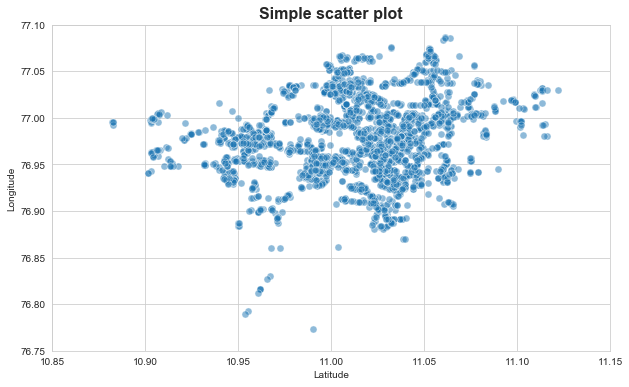

In [101]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.scatterplot('Latitude', 'Longitude', s=50,data=X,
               palette='tab10',alpha=0.5)

ax.set_title("Simple scatter plot",fontsize=16, weight='bold')
ax.set_xlim(10.85, 11.15)
ax.set_ylim(76.75, 77.10)

#### Clusters colored with hue as per labels

(76.75, 77.1)

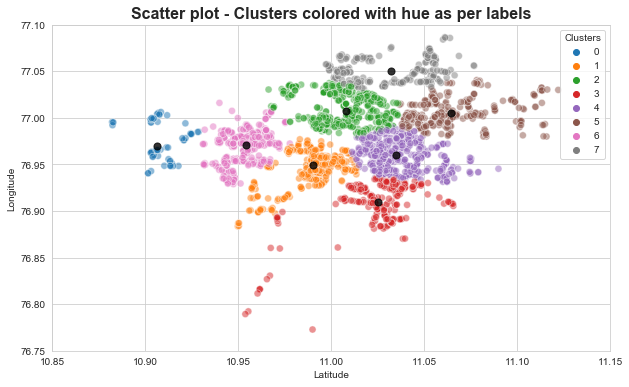

In [102]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize = (10,6))
ax = sns.scatterplot('Latitude', 'Longitude', s=50,data=df,hue=kmeans.labels_,
               palette='tab10',alpha=0.5)

plt.scatter(centroids[:, 0], centroids[:, 1], c='black',alpha=0.8, s=50)

ax.set_title("Scatter plot - Clusters colored with hue as per labels",fontsize=16, weight='bold')
ax.legend(bbox_to_anchor=(1,1), title='Clusters')
ax.set_xlim(10.85, 11.15)
ax.set_ylim(76.75, 77.10)

#### Clusters colored with hue as per labels & labels on center

(76.75, 77.1)

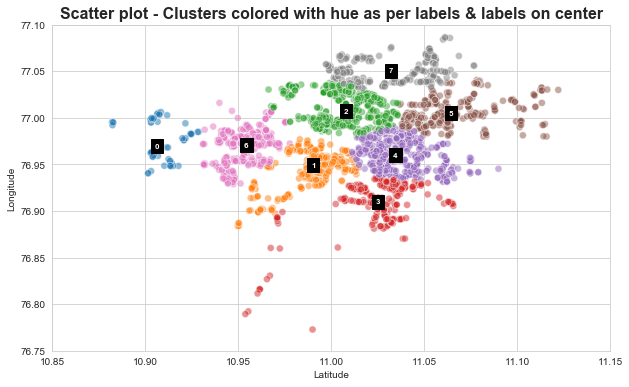

In [103]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize = (10,6))

# Scatter plot of clustering
ax = sns.scatterplot('Latitude', 'Longitude', data=X, s=50, hue=kmeans.labels_,
               palette='tab10', alpha=0.5, ax=ax, legend=False)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', alpha=0.8, s=50)    


#loop through labels and plot each cluster
for i, label in enumerate(dict_centriods.keys()):
        
    #add label
    plt.annotate(label,
                     dict_centriods[label],
                     horizontalalignment='center',
                     verticalalignment='center',
                     size=8, weight='bold',
                     color='white',
                     backgroundcolor='black') 
    
ax.set_title("Scatter plot - Clusters colored with hue as per labels & labels on center",fontsize=16, weight='bold')
ax.set_xlim(10.85, 11.15)
ax.set_ylim(76.75, 77.10)

#### Clusters colored with hue as per labels, with Voronoi line as separation of clusters

(76.75, 77.1)

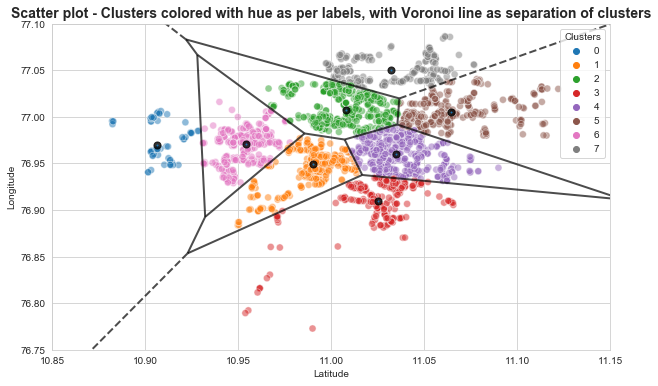

In [105]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize = (10,6))

# Voronoi plot
vor = Voronoi(centroids) 
voronoi_plot_2d(vor,show_vertices=False,line_colors='black',
                line_width=2, line_alpha=0.7, point_size=2, ax=ax) 

# scatter plot
scatter = sns.scatterplot('Latitude', 'Longitude', data=X, s=50, hue=kmeans.labels_,
               palette='tab10', alpha=0.5, ax=ax)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', alpha=0.8, s=50)

ax.set_title("Scatter plot - Clusters colored with hue as per labels, with Voronoi line as separation of clusters",fontsize=14, weight='bold')
ax.legend(bbox_to_anchor=(1,1), title='Clusters')
ax.set_xlim(10.85, 11.15)
ax.set_ylim(76.75, 77.10)

(76.75, 77.1)

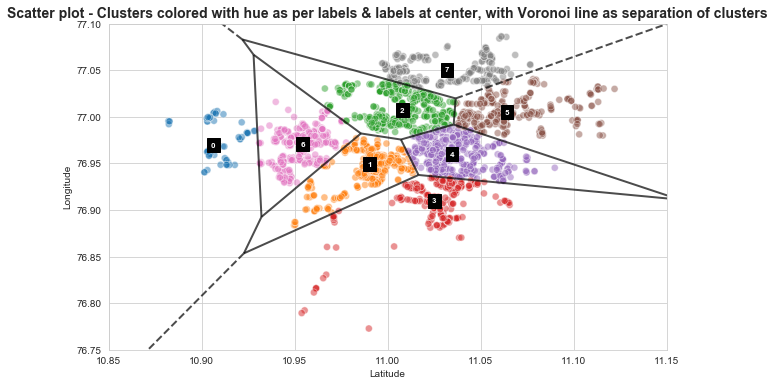

In [112]:
# Clusters colored with hue as per labels & labels on center, with Voronoi line as separation of clusters

sns.color_palette("tab10")
fig, ax = plt.subplots(figsize = (10,6))

# Voronoi plot
vor = Voronoi(centroids) 
voronoi_plot_2d(vor,show_vertices=False,line_colors='black',
                line_width=2, line_alpha=0.7, point_size=2,ax=ax) 


# Scatter plot of clusters
ax = sns.scatterplot('Latitude', 'Longitude', data=X, s=50, hue=kmeans.labels_,
               palette='tab10', alpha=0.5, ax=ax, legend=False)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', alpha=0.8, s=50)    


#loop through labels and plot each cluster
for i, label in enumerate(dict_centriods.keys()):
    
    #add label
    plt.annotate(label,
                     dict_centriods[label],
                     horizontalalignment='center',
                     verticalalignment='center',
                     size=8, weight='bold',
                     color='white',
                     backgroundcolor='black') 

ax.set_title("Scatter plot - Clusters colored with hue as per labels & labels at center, with Voronoi line as separation of clusters",fontsize=14, weight='bold')
ax.set_xlim(10.85, 11.15)
ax.set_ylim(76.75, 77.10)

#### Clusters in grid

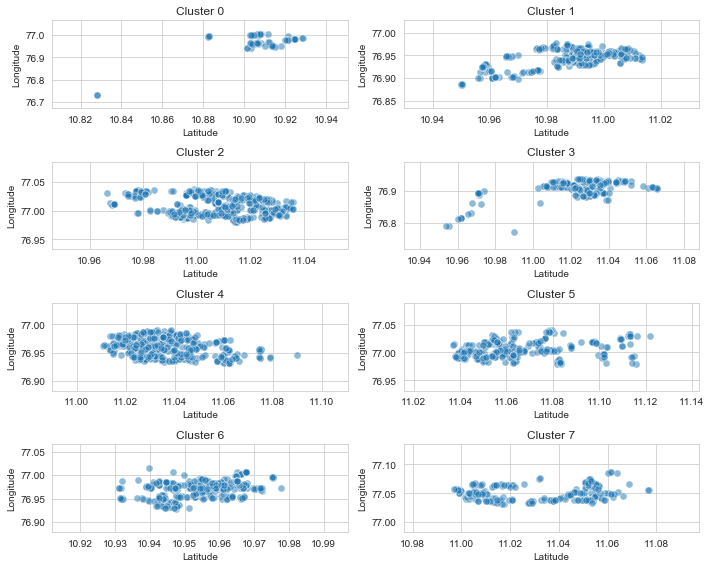

In [173]:
# Plot in grid
sns.set_style("whitegrid")

# Sort cluster list
x = cluster_input_df['ClusterNumber'].unique()
x = np.sort(x)

fig, axes = plt.subplots(ncols=2, nrows=4,figsize = (10,8))
for i,ax in zip(list(x),axes.flat):
    df = cluster_input_df[cluster_input_df['ClusterNumber']==i]
    ax = sns.scatterplot('Latitude', 'Longitude', s=50,data=df,ax=ax,
               palette='tab10',alpha=0.5)
    ax.set_title('Cluster '+str(i))

plt.tight_layout()
plt.show()

### Total/Average distance to be travelled in each cluster (Use-case specific)

In [174]:
def distance_calc(row):

    start = (row['Latitude'], row['Longitude'])
    stop = (row['Latitude'], row['Longitude'])    
        
    distance = geodesic(start, stop).kilometers 
    return distance

In [175]:
df1 = cluster_input_df

In [178]:
def routeDistance(df1,i):
    df = df1[['Latitude','Longitude']][df1['UniqueClusterID']==i]

    point1 = df.iloc[0]

    def to_xy(point):

        r = 6371000 #radians of the earth (m)
        lam,phi = point
        cos_phi_0 = np.cos(np.radians(phi))

        return (r * np.radians(lam) * cos_phi_0, 
                r * np.radians(phi))

    point1_xy = to_xy(point1)

    df['to_xy'] = df.apply(lambda x: 
             tuple(x.values),
             axis=1).map(to_xy)

    df['Y'], df['X'] = df.to_xy.str[0], df.to_xy.str[1]

    df = df[['X','Y']] 
    df = df.diff()

    dist = np.sqrt(df['X']**2 + df['Y']**2)

    #Convert to km
    dist = dist/1000
    
    df2 = pd.concat([df1[df1['UniqueClusterID']==i], dist], axis=1)
    
    return df2

In [179]:
route_list = list(cluster_input_df['UniqueClusterID'].unique())

In [186]:
df_final = pd.DataFrame()

for i in route_list:
    df = routeDistance(df1,i)
    df_final = df_final.append(df)

In [187]:
df_final.head()

,ClientName,Latitude,Longitude,ClusterNumber,centroids,UniqueClusterID,0
0,Monica Robinson,11.026315,76.962325,4,"[11.034587008659217, 76.96008317974861]",C_4,NaN
5,Amy Smith,11.061564,76.950910,4,"[11.034587008659217, 76.96008317974861]",C_4,1.694702
9,Angela Lee,11.043042,76.939653,4,"[11.034587008659217, 76.96008317974861]",C_4,1.272698
18,Tyler Stokes,11.041522,76.976775,4,"[11.034587008659217, 76.96008317974861]",C_4,4.207109
24,Valerie Scott,11.028291,76.953740,4,"[11.034587008659217, 76.96008317974861]",C_4,2.565659


In [189]:
df1_final = df_final.groupby(['UniqueClusterID'],as_index=False) \
        .agg({'ClientName' : 'count', 0:'sum'}).rename(columns={0:'RouteDistance',
                                                                   'ClientName':'#Outlets'})

df1_final['AvgRouteDistance'] = df1_final['RouteDistance']/df1_final['#Outlets']

In [191]:
df1_final

,UniqueClusterID,#Outlets,RouteDistance,AvgRouteDistance
0,C_0,69,303.553204,4.399322
1,C_1,575,1145.518360,1.992206
2,C_2,673,1437.392400,2.135799
3,C_3,347,944.619335,2.722246
4,C_4,715,1404.266462,1.964009
5,C_5,373,699.260774,1.874694
6,C_6,425,919.890277,2.164448
7,C_7,257,461.637693,1.796256


Reference:
1. Calculate distance using latitude and longitude in a pandas dataframe - https://stackoverflow.com/questions/55464087/how-to-calculate-distance-using-latitude-and-longitude-in-a-pandas-dataframe
2. Distance between coordinates can be roughly determined. (Check link)